In [1]:
# To connect Google Colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# To check the files that available in the current file location
!ls '/content/drive/MyDrive/new_train_yolo2'  

 backup		       custom_weight   darknet.py   pic.zip	  test
'Copy of YOLO.ipynb'   darknet	       pic	    __pycache__   utils.py


In [3]:
#this is to import OpenCV taht use to load images into coding. 
import cv2 

#this is to import matplotlib that use to plot the image when we resize the image and plot the original image.
import matplotlib.pyplot as plt 

#this is to import utils that contain a helper function to help with the coding. example on the (class_names = load_class_names(namesfile))
from utils import * 
 
#this is to import darknet to the coding.
from  darknet import Darknet


ModuleNotFoundError: ignored

In [ ]:
# Set the location and name of the cfg file
cfg_file = '/content/drive/MyDrive/new_train_yolo2/darknet/cfg/yolov3_custom.CFG'

# Set the location and name of the pre-trained weights file
weight_file = '/content/drive/MyDrive/new_train_yolo2/backup/yolov3_custom_last.weights'

# Set the location and name of the COCO object classes file
namesfile = '/content/drive/MyDrive/new_train_yolo2/pic/classes.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)



It took 0.802 seconds to detect the objects in the image.

Number of Objects Detected: 1 

Objects Found and Confidence Level:

1. cat: 1.000000


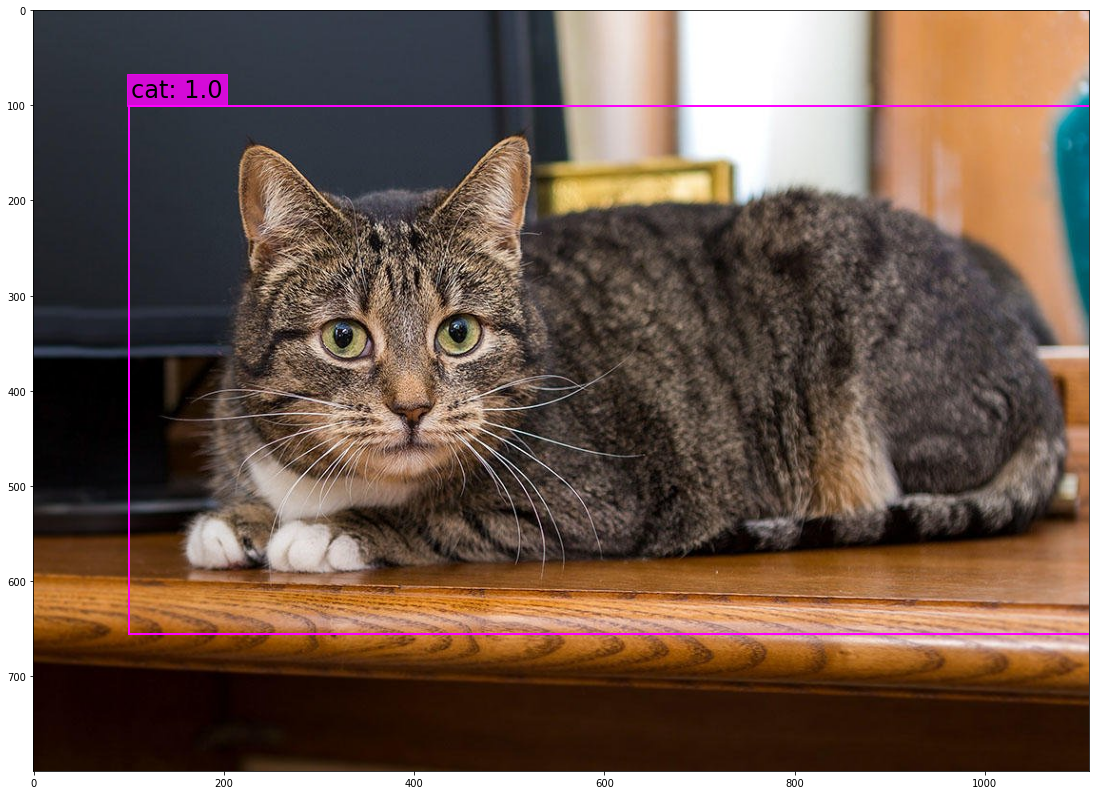

In [ ]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('/content/drive/MyDrive/new_train_yolo2/pic/cat.jpg')

# Convert the image to RGB. his function loads images as BGR we will convert our images to RGB so we can display them with the correct colors.
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Set the IOU threshold. Default value is 0.4
#this to remove bounding box that sometime its ovelap with the truth bounding box.
iou_thresh = 0.4

# Set the NMS threshold. Default value is 0.6
#this is to set only a bounding box with confident value is higher than 0.6 to be appear in the image detect.
nms_thresh = 0.6

# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)